In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd

In [0]:
path = '/content/drive/My Drive/Team 2 BI/Meet/Fake_News/train.csv'
train_data = pd.read_csv(path)

In [4]:
train_data.shape

(20800, 5)

In [5]:
train_data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
train_data[['title' , 'author']] = train_data[['title' , 'author']].fillna(value = 'Missing')
train_data = train_data.dropna()
train_data.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [7]:
length = []
[length.append(len(str(text))) for text in train_data['text']]
train_data['length'] = length
train_data.head()

,id,title,author,text,label,length
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,4930
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,4160
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,7692
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,3237
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,938


In [8]:
len(train_data[train_data['length'] < 50])

207

In [9]:
train_data['text'][train_data['length'] < 50]

82                                                   
169                                                  
173                                   Guest   Guest  
196            They got the heater turned up on high.
295                                                  
                             ...                     
20350                         I hope nobody got hurt!
20418                                 Guest   Guest  
20431    \nOctober 28, 2016 The Mothers by stclair by
20513                                                
20636                              Trump all the way!
Name: text, Length: 207, dtype: object

In [0]:
train_data = train_data.drop(train_data['text'][train_data['length'] < 50].index, axis = 0)

In [0]:
train_data = train_data.apply(lambda x: x.astype(str).str.lower())


In [0]:
train_data['title'] = train_data['title'].str.replace('[^\w\s]','')
train_data['title'] = train_data['title'].str.replace('<.*?>','')
train_data['text'] = train_data['text'].str.replace('[^\w\s]','')
train_data['text'] = train_data['text'].str.replace('<.*?>','')

In [13]:
import tensorflow as tf
from keras.preprocessing.text import text_to_word_sequence

Using TensorFlow backend.


In [0]:
tokens = []
[tokens.append(text_to_word_sequence(text)) for text in train_data['text']]
train_data['tokens_text'] = tokens


In [0]:
tokens = []
[tokens.append(text_to_word_sequence(text)) for text in train_data['title']]
train_data['tokens_title'] = tokens


In [16]:
train_data[['tokens_title' , 'tokens_text']]

,tokens_title,tokens_text
0,"[house, dem, aide, we, didnt, even, see, comey...","[house, dem, aide, we, didnt, even, see, comey..."
1,"[flynn, hillary, clinton, big, woman, on, camp...","[ever, get, the, feeling, your, life, circles,..."
2,"[why, the, truth, might, get, you, fired]","[why, the, truth, might, get, you, fired, octo..."
3,"[15, civilians, killed, in, single, us, airstr...","[videos, 15, civilians, killed, in, single, us..."
4,"[iranian, woman, jailed, for, fictional, unpub...","[print, an, iranian, woman, has, been, sentenc..."
...,...,...
20795,"[rapper, ti, trump, a, poster, child, for, whi...","[rapper, t, i, unloaded, on, black, celebritie..."
20796,"[nfl, playoffs, schedule, matchups, and, odds,...","[when, the, green, bay, packers, lost, to, the..."
20797,"[macys, is, said, to, receive, takeover, appro...","[the, macys, of, today, grew, from, the, union..."
20798,"[nato, russia, to, hold, parallel, exercises, ...","[nato, russia, to, hold, parallel, exercises, ..."


In [17]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stops = set(stopwords.words("english"))

def remove_stops(row):
  my_list = row['tokens_title']
  final_text = [w for w in my_list if not w in stops]
  return(final_text)

train_data['title'] = train_data.apply(remove_stops, axis = 1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
from nltk.corpus import stopwords
stops = set(stopwords.words("english"))

def remove_stops(row):
  my_list = row['tokens_text']
  final_text = [w for w in my_list if not w in stops]
  return(final_text)

train_data['text'] = train_data.apply(remove_stops, axis = 1)

In [0]:
def rejoin_words(row):
  my_list = row['text']
  joined_words = ( " ".join(my_list))
  return joined_words

train_data['text'] = train_data.apply(rejoin_words, axis = 1)

In [0]:
def rejoin_words(row):
  my_list = row['title']
  joined_words = ( " ".join(my_list))
  return joined_words

train_data['title'] = train_data.apply(rejoin_words, axis = 1)

In [21]:
train_data[['title' , 'text']]

,title,text
0,house dem aide didnt even see comeys letter ja...,house dem aide didnt even see comeys letter ja...
1,flynn hillary clinton big woman campus breitbart,ever get feeling life circles roundabout rathe...
2,truth might get fired,truth might get fired october 29 2016 tension ...
3,15 civilians killed single us airstrike identi...,videos 15 civilians killed single us airstrike...
4,iranian woman jailed fictional unpublished sto...,print iranian woman sentenced six years prison...
...,...,...
20795,rapper ti trump poster child white supremacy,rapper unloaded black celebrities met donald t...
20796,nfl playoffs schedule matchups odds new york t...,green bay packers lost washington redskins wee...
20797,macys said receive takeover approach hudsons b...,macys today grew union several great names ame...
20798,nato russia hold parallel exercises balkans,nato russia hold parallel exercises balkans 11...


In [0]:
max_features = 4500

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer = Tokenizer(num_words = max_features, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower = True, split = ' ')
tokenizer.fit_on_texts(texts = train_data['text'])
X = tokenizer.texts_to_sequences(texts = train_data['text'])

In [0]:
word_index = tokenizer.word_index

In [0]:
X = pad_sequences(sequences = X, maxlen = 1000, padding = 'pre')

In [26]:
from keras.utils.np_utils import to_categorical
import numpy as np

print(X.shape)
y = to_categorical(np.asarray(train_data['label'].values), num_classes = 2)
print(y.shape)

(20554, 1000)
(20554, 2)


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
x_test, x_val, y_test, y_val = train_test_split( X, y, test_size=0.50, random_state=42)

In [28]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

213562


In [29]:
import os
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM

MAX_SEQUENCE_LENGTH = 1000
GLOVE_DIR = '/content/drive/My Drive/glove.6B.100d.txt' 
EMBEDDING_DIM = 100
embeddings_index = {}
f = open(os.path.join(GLOVE_DIR), encoding="utf8")
for line in f:
    values = line.split()
    #print(values[1:])
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Total %s word vectors in Glove.' % len(embeddings_index))

embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
        
embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH)

Total 400000 word vectors in Glove.


### **3 Channels, 16 filters**

In [31]:
from numpy import array
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate

#channel 1
input1 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding1 = Embedding(len(word_index)+1 , EMBEDDING_DIM , weights = [embedding_matrix], input_length = MAX_SEQUENCE_LENGTH, trainable = False)(input1)
conv1 = Conv1D(filters=16, kernel_size=4, activation='relu')(embedding1)
drop1 = Dropout(0.5)(conv1)
pool1 = MaxPooling1D(pool_size=2)(drop1)
flat1 = Flatten()(pool1)

#channel 2
input2 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding2 = Embedding(len(word_index)+1 , EMBEDDING_DIM , weights = [embedding_matrix], input_length = MAX_SEQUENCE_LENGTH, trainable = False)(input2)
conv2 = Conv1D(filters=16, kernel_size=6, activation='relu')(embedding2)
drop2 = Dropout(0.5)(conv2)
pool2 = MaxPooling1D(pool_size=2)(drop2)
flat2 = Flatten()(pool2)

#channel 3
input3 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding3 = Embedding(len(word_index)+1 , EMBEDDING_DIM , weights = [embedding_matrix], input_length = MAX_SEQUENCE_LENGTH, trainable = False)(input3)
conv3 = Conv1D(filters=16, kernel_size=8, activation='relu')(embedding3)
drop3 = Dropout(0.5)(conv3)
pool3 = MaxPooling1D(pool_size=2)(drop3)
flat3 = Flatten()(pool3)


merged = concatenate([flat1, flat2, flat3])


# dense1 = Dense(256, activation = 'relu')(merged)
# dense2 = Dense(128, activation = 'relu')(dense1)
# dense3 = Dense(64, activation = 'relu')(dense2)
dense4 = Dense(32, activation = 'relu')(merged)
outputs = Dense(2, activation = 'softmax')(dense4)

model = Model(inputs=[input1, input2, input3], outputs=outputs)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())
multicnn = model.fit([X_train, X_train, X_train], array(y_train), validation_data = ([x_val, x_val, x_val], y_val),  epochs=10, batch_size=16)




Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 1000)         0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            (None, 1000)         0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            (None, 1000)         0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 1000, 100)    21356200    input_4[0][0]                    
____________________________________________________________________________________________

In [34]:
test_preds = model.predict([X_train, X_train, X_train])
test_preds = np.round(test_preds)
correct_predictions = float(sum(test_preds == y_train)[0])
print("Correct predictions:", correct_predictions)
print("Total number of test examples:", len(y_train))
print("Accuracy of model1: ", correct_predictions/float(len(y_train)))

Correct predictions: 16404.0
Total number of test examples: 16443
Accuracy of model1:  0.9976281700419631


In [36]:
test_preds = model.predict([x_test, x_test, x_test])
test_preds = np.round(test_preds)
correct_predictions = float(sum(test_preds == y_test)[0])
print("Correct predictions:", correct_predictions)
print("Total number of test examples:", len(y_test))
print("Accuracy of model1: ", correct_predictions/float(len(y_test)))

Correct predictions: 10250.0
Total number of test examples: 10277
Accuracy of model1:  0.9973727741558821


In [37]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

x_pred = model.predict([x_test, x_test, x_test])
x_pred = np.round(x_pred)
x_pred = x_pred.argmax(1)
y_test_s = y_test.argmax(1)

confusion_matrix = pd.crosstab(y_test_s, x_pred, rownames = ['Actual'], colnames = ['Predicted'])

print (confusion_matrix)

Predicted     0     1
Actual               
0          5188    10
1            17  5062


Based on the confusion matrix, the calculations are-


1.   Precision - 0.9981
2.   Recall - 0.9967
3.   Accuracy - 0.9974
4.   F1 score - 0.9974



### **5 Channels, 16 filters**

In [39]:
from numpy import array
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate

#channel 1
input1 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding1 = Embedding(len(word_index)+1 , EMBEDDING_DIM , weights = [embedding_matrix], input_length = MAX_SEQUENCE_LENGTH, trainable = False)(input1)
conv1 = Conv1D(filters=16, kernel_size=4, activation='relu')(embedding1)
drop1 = Dropout(0.5)(conv1)
pool1 = MaxPooling1D(pool_size=2)(drop1)
flat1 = Flatten()(pool1)

#channel 2
input2 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding2 = Embedding(len(word_index)+1 , EMBEDDING_DIM , weights = [embedding_matrix], input_length = MAX_SEQUENCE_LENGTH, trainable = False)(input2)
conv2 = Conv1D(filters=16, kernel_size=6, activation='relu')(embedding2)
drop2 = Dropout(0.5)(conv2)
pool2 = MaxPooling1D(pool_size=2)(drop2)
flat2 = Flatten()(pool2)

#channel 3
input3 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding3 = Embedding(len(word_index)+1 , EMBEDDING_DIM , weights = [embedding_matrix], input_length = MAX_SEQUENCE_LENGTH, trainable = False)(input3)
conv3 = Conv1D(filters=16, kernel_size=8, activation='relu')(embedding3)
drop3 = Dropout(0.5)(conv3)
pool3 = MaxPooling1D(pool_size=2)(drop3)
flat3 = Flatten()(pool3)

#channel 4
input4 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding4 = Embedding(len(word_index)+1 , EMBEDDING_DIM , weights = [embedding_matrix], input_length = MAX_SEQUENCE_LENGTH, trainable = False)(input4)
conv4 = Conv1D(filters=16, kernel_size=10, activation='relu')(embedding4)
drop4 = Dropout(0.5)(conv4)
pool4 = MaxPooling1D(pool_size=2)(drop4)
flat4 = Flatten()(pool4)

#channel 5
input5 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding5 = Embedding(len(word_index)+1 , EMBEDDING_DIM , weights = [embedding_matrix], input_length = MAX_SEQUENCE_LENGTH, trainable = False)(input5)
conv5 = Conv1D(filters=16, kernel_size=12, activation='relu')(embedding5)
drop5 = Dropout(0.5)(conv5)
pool5 = MaxPooling1D(pool_size=2)(drop5)
flat5 = Flatten()(pool5)

merged = concatenate([flat1, flat2, flat3, flat4, flat5])


# dense1 = Dense(256, activation = 'relu')(merged)
# dense2 = Dense(128, activation = 'relu')(dense1)
# dense3 = Dense(64, activation = 'relu')(dense2)
dense4 = Dense(32, activation = 'relu')(merged)
outputs = Dense(2, activation = 'softmax')(dense4)

model = Model(inputs=[input1, input2, input3, input4, input5], outputs=outputs)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())
multicnn5 = model.fit([X_train, X_train, X_train, X_train, X_train], array(y_train), validation_data = ([x_val, x_val, x_val, x_val, x_val], y_val),  epochs=10, batch_size=16)




Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           (None, 1000)         0                                            
__________________________________________________________________________________________________
input_13 (InputLayer)           (None, 1000)         0                                            
__________________________________________________________________________________________________
input_14 (InputLayer)           (None, 1000)         0                                            
__________________________________________________________________________________________________
input_15 (InputLayer)           (None, 1000)         0                                            
____________________________________________________________________________________________

In [41]:
test_preds = model.predict([X_train, X_train, X_train, X_train, X_train])
test_preds = np.round(test_preds)
correct_predictions = float(sum(test_preds == y_train)[0])
print("Correct predictions:", correct_predictions)
print("Total number of test examples:", len(y_train))
print("Accuracy of model1: ", correct_predictions/float(len(y_train)))

Correct predictions: 16392.0
Total number of test examples: 16443
Accuracy of model1:  0.996898376208721


In [42]:
test_preds = model.predict([x_test, x_test, x_test, x_test, x_test])
test_preds = np.round(test_preds)
correct_predictions = float(sum(test_preds == y_test)[0])
print("Correct predictions:", correct_predictions)
print("Total number of test examples:", len(y_test))
print("Accuracy of model1: ", correct_predictions/float(len(y_test)))

Correct predictions: 10245.0
Total number of test examples: 10277
Accuracy of model1:  0.9968862508514158


In [44]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

x_pred = model.predict([x_test, x_test, x_test, x_test, x_test])
x_pred = np.round(x_pred)
x_pred = x_pred.argmax(1)
y_test_s = y_test.argmax(1)

confusion_matrix = pd.crosstab(y_test_s, x_pred, rownames = ['Actual'], colnames = ['Predicted'])

print (confusion_matrix)

Predicted     0     1
Actual               
0          5171    27
1             5  5074


Based on the confusion matrix, the calculations are -


1.   Precision - 0.9948
2.   Recall - 0.9990
3.   Accuracy - 0.9969
4.   F1 score - 0.9969



### **7 channels 8 filters**

In [69]:
from numpy import array
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate

#channel 1
input1 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding1 = Embedding(len(word_index)+1 , EMBEDDING_DIM , weights = [embedding_matrix], input_length = MAX_SEQUENCE_LENGTH, trainable = False)(input1)
conv1 = Conv1D(filters=8, kernel_size=4, activation='relu')(embedding1)
drop1 = Dropout(0.5)(conv1)
pool1 = MaxPooling1D(pool_size=2)(drop1)
flat1 = Flatten()(pool1)

#channel 2
input2 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding2 = Embedding(len(word_index)+1 , EMBEDDING_DIM , weights = [embedding_matrix], input_length = MAX_SEQUENCE_LENGTH, trainable = False)(input2)
conv2 = Conv1D(filters=8, kernel_size=6, activation='relu')(embedding2)
drop2 = Dropout(0.5)(conv2)
pool2 = MaxPooling1D(pool_size=2)(drop2)
flat2 = Flatten()(pool2)

#channel 3
input3 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding3 = Embedding(len(word_index)+1 , EMBEDDING_DIM , weights = [embedding_matrix], input_length = MAX_SEQUENCE_LENGTH, trainable = False)(input3)
conv3 = Conv1D(filters=8, kernel_size=8, activation='relu')(embedding3)
drop3 = Dropout(0.5)(conv3)
pool3 = MaxPooling1D(pool_size=2)(drop3)
flat3 = Flatten()(pool3)

#channel 4
input4 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding4 = Embedding(len(word_index)+1 , EMBEDDING_DIM , weights = [embedding_matrix], input_length = MAX_SEQUENCE_LENGTH, trainable = False)(input4)
conv4 = Conv1D(filters=8, kernel_size=10, activation='relu')(embedding4)
drop4 = Dropout(0.5)(conv4)
pool4 = MaxPooling1D(pool_size=2)(drop4)
flat4 = Flatten()(pool4)

#channel 5
input5 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding5 = Embedding(len(word_index)+1 , EMBEDDING_DIM , weights = [embedding_matrix], input_length = MAX_SEQUENCE_LENGTH, trainable = False)(input5)
conv5 = Conv1D(filters=8, kernel_size=12, activation='relu')(embedding5)
drop5 = Dropout(0.5)(conv5)
pool5 = MaxPooling1D(pool_size=2)(drop5)
flat5 = Flatten()(pool5)

#channel 6
input6 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding6 = Embedding(len(word_index)+1 , EMBEDDING_DIM , weights = [embedding_matrix], input_length = MAX_SEQUENCE_LENGTH, trainable = False)(input6)
conv6 = Conv1D(filters=8, kernel_size=14, activation='relu')(embedding6)
drop6 = Dropout(0.5)(conv6)
pool6 = MaxPooling1D(pool_size=2)(drop6)
flat6 = Flatten()(pool6)

#channel 7
input7 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding7 = Embedding(len(word_index)+1 , EMBEDDING_DIM , weights = [embedding_matrix], input_length = MAX_SEQUENCE_LENGTH, trainable = False)(input7)
conv7 = Conv1D(filters=8, kernel_size=16, activation='relu')(embedding7)
drop7 = Dropout(0.5)(conv7)
pool7 = MaxPooling1D(pool_size=2)(drop7)
flat7 = Flatten()(pool7)


merged = concatenate([flat1, flat2, flat3, flat4, flat5, flat6, flat7])


# dense1 = Dense(256, activation = 'relu')(merged)
# dense2 = Dense(128, activation = 'relu')(dense1)
# dense3 = Dense(64, activation = 'relu')(dense2)
dense4 = Dense(32, activation = 'relu')(merged)
outputs = Dense(2, activation = 'softmax')(dense4)

model7 = Model(inputs=[input1, input2, input3, input4, input5, input6, input7], outputs=outputs)

model7.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model7.summary())
multicnn7 = model7.fit([X_train, X_train, X_train, X_train, X_train, X_train, X_train], array(y_train), validation_data = ([x_val, x_val, x_val, x_val, x_val, x_val, x_val], y_val),  epochs=10, batch_size=16)




Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_38 (InputLayer)           (None, 1000)         0                                            
__________________________________________________________________________________________________
input_39 (InputLayer)           (None, 1000)         0                                            
__________________________________________________________________________________________________
input_40 (InputLayer)           (None, 1000)         0                                            
__________________________________________________________________________________________________
input_41 (InputLayer)           (None, 1000)         0                                            
___________________________________________________________________________________________

In [71]:
test_preds = model7.predict([X_train, X_train,X_train, X_train,X_train, X_train,X_train])
test_preds = np.round(test_preds)
correct_predictions = float(sum(test_preds == y_train)[0])
print("Correct predictions:", correct_predictions)
print("Total number of test examples:", len(y_train))
print("Accuracy of model1: ", correct_predictions/float(len(y_train)))

Correct predictions: 16390.0
Total number of test examples: 16443
Accuracy of model1:  0.9967767439031807


In [72]:
test_preds = model7.predict([x_test, x_test, x_test, x_test, x_test, x_test, x_test])
test_preds = np.round(test_preds)
correct_predictions = float(sum(test_preds == y_test)[0])
print("Correct predictions:", correct_predictions)
print("Total number of test examples:", len(y_test))
print("Accuracy of model1: ", correct_predictions/float(len(y_test)))

Correct predictions: 10243.0
Total number of test examples: 10277
Accuracy of model1:  0.9966916415296293


In [73]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

x_pred = model7.predict([x_test, x_test, x_test, x_test, x_test, x_test, x_test])
x_pred = np.round(x_pred)
x_pred = x_pred.argmax(1)
y_test_s = y_test.argmax(1)

confusion_matrix = pd.crosstab(y_test_s, x_pred, rownames = ['Actual'], colnames = ['Predicted'])

print (confusion_matrix)

Predicted     0     1
Actual               
0          5174    24
1            10  5069


Based on the confusion matrix, the calculations are-


1.   Precision - 0.9954
2.   Recall - 0.9981
3.   Accuracy - 0.9967
4.   F1 score - 0.9967



### **2 Channels, 32 filters**

In [49]:
from numpy import array
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate

#channel 1
input1 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding1 = Embedding(len(word_index)+1 , EMBEDDING_DIM , weights = [embedding_matrix], input_length = MAX_SEQUENCE_LENGTH, trainable = False)(input1)
conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
drop1 = Dropout(0.5)(conv1)
pool1 = MaxPooling1D(pool_size=2)(drop1)
flat1 = Flatten()(pool1)

#channel 2
input2 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding2 = Embedding(len(word_index)+1 , EMBEDDING_DIM , weights = [embedding_matrix], input_length = MAX_SEQUENCE_LENGTH, trainable = False)(input2)
conv2 = Conv1D(filters=32, kernel_size=6, activation='relu')(embedding2)
drop2 = Dropout(0.5)(conv2)
pool2 = MaxPooling1D(pool_size=2)(drop2)
flat2 = Flatten()(pool2)

# #channel 3
# input3 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
# embedding3 = Embedding(len(word_index)+1 , EMBEDDING_DIM , weights = [embedding_matrix], input_length = MAX_SEQUENCE_LENGTH, trainable = False)(input3)
# conv3 = Conv1D(filters=32, kernel_size=8, activation='relu')(embedding3)
# drop3 = Dropout(0.5)(conv3)
# pool3 = MaxPooling1D(pool_size=2)(drop3)
# flat3 = Flatten()(pool3)


merged = concatenate([flat1, flat2])


# dense1 = Dense(256, activation = 'relu')(merged)
# dense2 = Dense(128, activation = 'relu')(dense1)
# dense3 = Dense(64, activation = 'relu')(dense2)
dense4 = Dense(32, activation = 'relu')(merged)
outputs = Dense(2, activation = 'softmax')(dense4)

model3 = Model(inputs=[input1, input2], outputs=outputs)

model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())
multicnn3 = model3.fit(([X_train, X_train]), array(y_train), validation_data = ([x_val, x_val], y_val),  epochs=10, batch_size=32)




Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           (None, 1000)         0                                            
__________________________________________________________________________________________________
input_13 (InputLayer)           (None, 1000)         0                                            
__________________________________________________________________________________________________
input_14 (InputLayer)           (None, 1000)         0                                            
__________________________________________________________________________________________________
input_15 (InputLayer)           (None, 1000)         0                                            
____________________________________________________________________________________________

In [50]:
test_preds = model3.predict([X_train, X_train])
test_preds = np.round(test_preds)
correct_predictions = float(sum(test_preds == y_train)[0])
print("Correct predictions:", correct_predictions)
print("Total number of test examples:", len(y_train))
print("Accuracy of model1: ", correct_predictions/float(len(y_train)))

Correct predictions: 16412.0
Total number of test examples: 16443
Accuracy of model1:  0.9981146992641245


In [52]:
test_preds = model3.predict([x_test, x_test])
test_preds = np.round(test_preds)
correct_predictions = float(sum(test_preds == y_test)[0])
print("Correct predictions:", correct_predictions)
print("Total number of test examples:", len(y_test))
print("Accuracy of model1: ", correct_predictions/float(len(y_test)))

Correct predictions: 10258.0
Total number of test examples: 10277
Accuracy of model1:  0.9981512114430281


In [53]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

x_pred = model3.predict([x_test, x_test])
x_pred = np.round(x_pred)
x_pred = x_pred.argmax(1)
y_test_s = y_test.argmax(1)

confusion_matrix = pd.crosstab(y_test_s, x_pred, rownames = ['Actual'], colnames = ['Predicted'])

print (confusion_matrix)

Predicted     0     1
Actual               
0          5191     7
1            12  5067


Based on the confusion matrix, the calculations are-



1.   Precision - 0.9987
2.   Recall - 0.9977
3.   Accuracy - 0.9982
4.   F1 score - 0.9982




### **2 channels 16 filter**

In [58]:
from numpy import array
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate

#channel 1
input1 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding1 = Embedding(len(word_index)+1 , EMBEDDING_DIM , weights = [embedding_matrix], input_length = MAX_SEQUENCE_LENGTH, trainable = False)(input1)
conv1 = Conv1D(filters=16, kernel_size=4, activation='relu')(embedding1)
drop1 = Dropout(0.5)(conv1)
pool1 = MaxPooling1D(pool_size=2)(drop1)
flat1 = Flatten()(pool1)

#channel 2
input2 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding2 = Embedding(len(word_index)+1 , EMBEDDING_DIM , weights = [embedding_matrix], input_length = MAX_SEQUENCE_LENGTH, trainable = False)(input2)
conv2 = Conv1D(filters=16, kernel_size=6, activation='relu')(embedding2)
drop2 = Dropout(0.5)(conv2)
pool2 = MaxPooling1D(pool_size=2)(drop2)
flat2 = Flatten()(pool2)

# #channel 3
# input3 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
# embedding3 = Embedding(len(word_index)+1 , EMBEDDING_DIM , weights = [embedding_matrix], input_length = MAX_SEQUENCE_LENGTH, trainable = False)(input3)
# conv3 = Conv1D(filters=32, kernel_size=8, activation='relu')(embedding3)
# drop3 = Dropout(0.5)(conv3)
# pool3 = MaxPooling1D(pool_size=2)(drop3)
# flat3 = Flatten()(pool3)


merged = concatenate([flat1, flat2])


# dense1 = Dense(256, activation = 'relu')(merged)
# dense2 = Dense(128, activation = 'relu')(dense1)
# dense3 = Dense(64, activation = 'relu')(dense2)
dense4 = Dense(32, activation = 'relu')(merged)
outputs = Dense(2, activation = 'softmax')(dense4)

model4 = Model(inputs=[input1, input2], outputs=outputs)

model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())
multicnn4 = model4.fit(([X_train, X_train]), array(y_train), validation_data = ([x_val, x_val], y_val),  epochs=10, batch_size=16)




Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           (None, 1000)         0                                            
__________________________________________________________________________________________________
input_13 (InputLayer)           (None, 1000)         0                                            
__________________________________________________________________________________________________
input_14 (InputLayer)           (None, 1000)         0                                            
__________________________________________________________________________________________________
input_15 (InputLayer)           (None, 1000)         0                                            
____________________________________________________________________________________________

In [59]:
test_preds = model4.predict([X_train, X_train])
test_preds = np.round(test_preds)
correct_predictions = float(sum(test_preds == y_train)[0])
print("Correct predictions:", correct_predictions)
print("Total number of test examples:", len(y_train))
print("Accuracy of model1: ", correct_predictions/float(len(y_train)))

Correct predictions: 16403.0
Total number of test examples: 16443
Accuracy of model1:  0.9975673538891929


In [61]:
test_preds = model4.predict([x_test, x_test])
test_preds = np.round(test_preds)
correct_predictions = float(sum(test_preds == y_test)[0])
print("Correct predictions:", correct_predictions)
print("Total number of test examples:", len(y_test))
print("Accuracy of model1: ", correct_predictions/float(len(y_test)))

Correct predictions: 10253.0
Total number of test examples: 10277
Accuracy of model1:  0.9976646881385618


In [62]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

x_pred = model4.predict([x_test, x_test])
x_pred = np.round(x_pred)
x_pred = x_pred.argmax(1)
y_test_s = y_test.argmax(1)

confusion_matrix = pd.crosstab(y_test_s, x_pred, rownames = ['Actual'], colnames = ['Predicted'])

print (confusion_matrix)

Predicted     0     1
Actual               
0          5184    14
1            10  5069


Based on the confusion matrix, the calculations are-


1.   Precision - 0.9973
2.   Recall - 0.9981
3.   Accuracy - 0.9977
4.   F1 score - 0.9977



### **Graph**

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


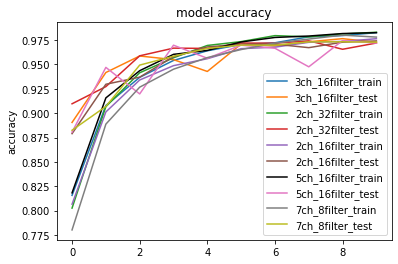

In [75]:

import matplotlib.pyplot as plt
%matplotlib inline 
# list all data in history
print(multicnn.history.keys())
print(multicnn3.history.keys())
print(multicnn4.history.keys())
print(multicnn5.history.keys())




plt.plot(multicnn.history['accuracy'])
plt.plot(multicnn.history['val_accuracy'])


plt.plot(multicnn3.history['accuracy'])
plt.plot(multicnn3.history['val_accuracy'])


plt.plot(multicnn4.history['accuracy'])
plt.plot(multicnn4.history['val_accuracy'])

plt.plot(multicnn5.history['accuracy'], color = 'black')
plt.plot(multicnn5.history['val_accuracy'])

plt.plot(multicnn7.history['accuracy'])
plt.plot(multicnn7.history['val_accuracy'])





plt.legend(['3ch_16filter_train'  , '3ch_16filter_test', '2ch_32filter_train', '2ch_32filter_test' , '2ch_16filter_train', '2ch_16filter_test', '5ch_16filter_train', '5ch_16filter_test', '7ch_8filter_train', '7ch_8filter_test'])


plt.title('model accuracy')
plt.ylabel('accuracy')


plt.show()

Acording to the graph, the best model is **5 channels with 16 filters**